<a href="https://colab.research.google.com/github/koroglubeyaz/ML-DeepLearning/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
import sys
sys.path.insert(0, 'drive/hw')

In [4]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

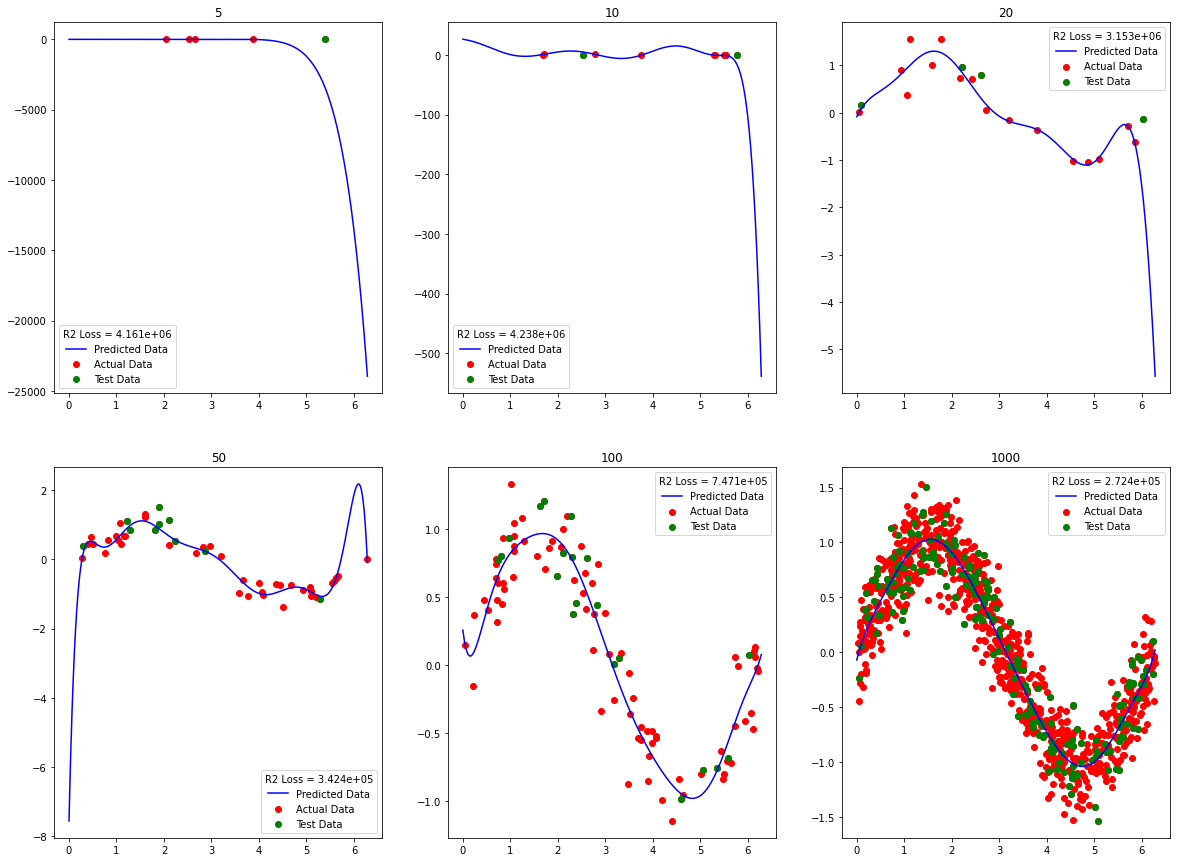

In [6]:
scores = []
line = np.linspace(0.0, 1.0, num=1000)*np.pi*2
rn = [5,10,20,50,100,1000]
k=0;l=0
fig, axs = plt.subplots(2, 3,figsize=(20,15))
for x in range(len(rn)):
    a = []
    b = []
    mean = 0
    variance = 0.05
    for i in range(rn[x]):
        rnd = np.pi*2*random.random()
        a.append(rnd)
        b.append(np.sin(rnd)+(random.gauss(mean,np.sqrt(variance))))

    a = np.array(a).reshape(-1,1)
    b = np.array(b).reshape(-1,1)

    x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.2)
    poly = PolynomialFeatures(degree=10)
    x_poly = poly.fit_transform(x_train)
    poly.fit(x_poly,y_train)
    lin = LinearRegression()
    lin.fit(x_poly,y_train)
    if l==3:
        k = 1
        l =0
    
    axs[k,l].scatter(a,b,label="Actual Data",color="red")
    axs[k,l].scatter(x_test,y_test,label="Test Data",color="green")
    #axs[k,l].scatter(x_test,lin.predict(poly.fit_transform(x_test)),label="Predicted Data")
    axs[k,l].plot(line,lin.predict(poly.fit_transform(line.reshape(-1,1))),label="Predicted Data",color="blue")
    axs[k,l].set_title(rn[x])
    r2 = np.linalg.norm(y_test-poly.fit_transform(x_test),ord=2)/rn[x]
    scores.append(r2)
    axs[k,l].legend(title="R2 Loss = "+'{0:.4g}'.format(r2))
    l = l+1